# Лабораторная работа №2

Выполнил студент группы 9382 Савельев И.С. 


1. Используя ДПФ построить траекторию основного тона (F0) на записи своего голоса.

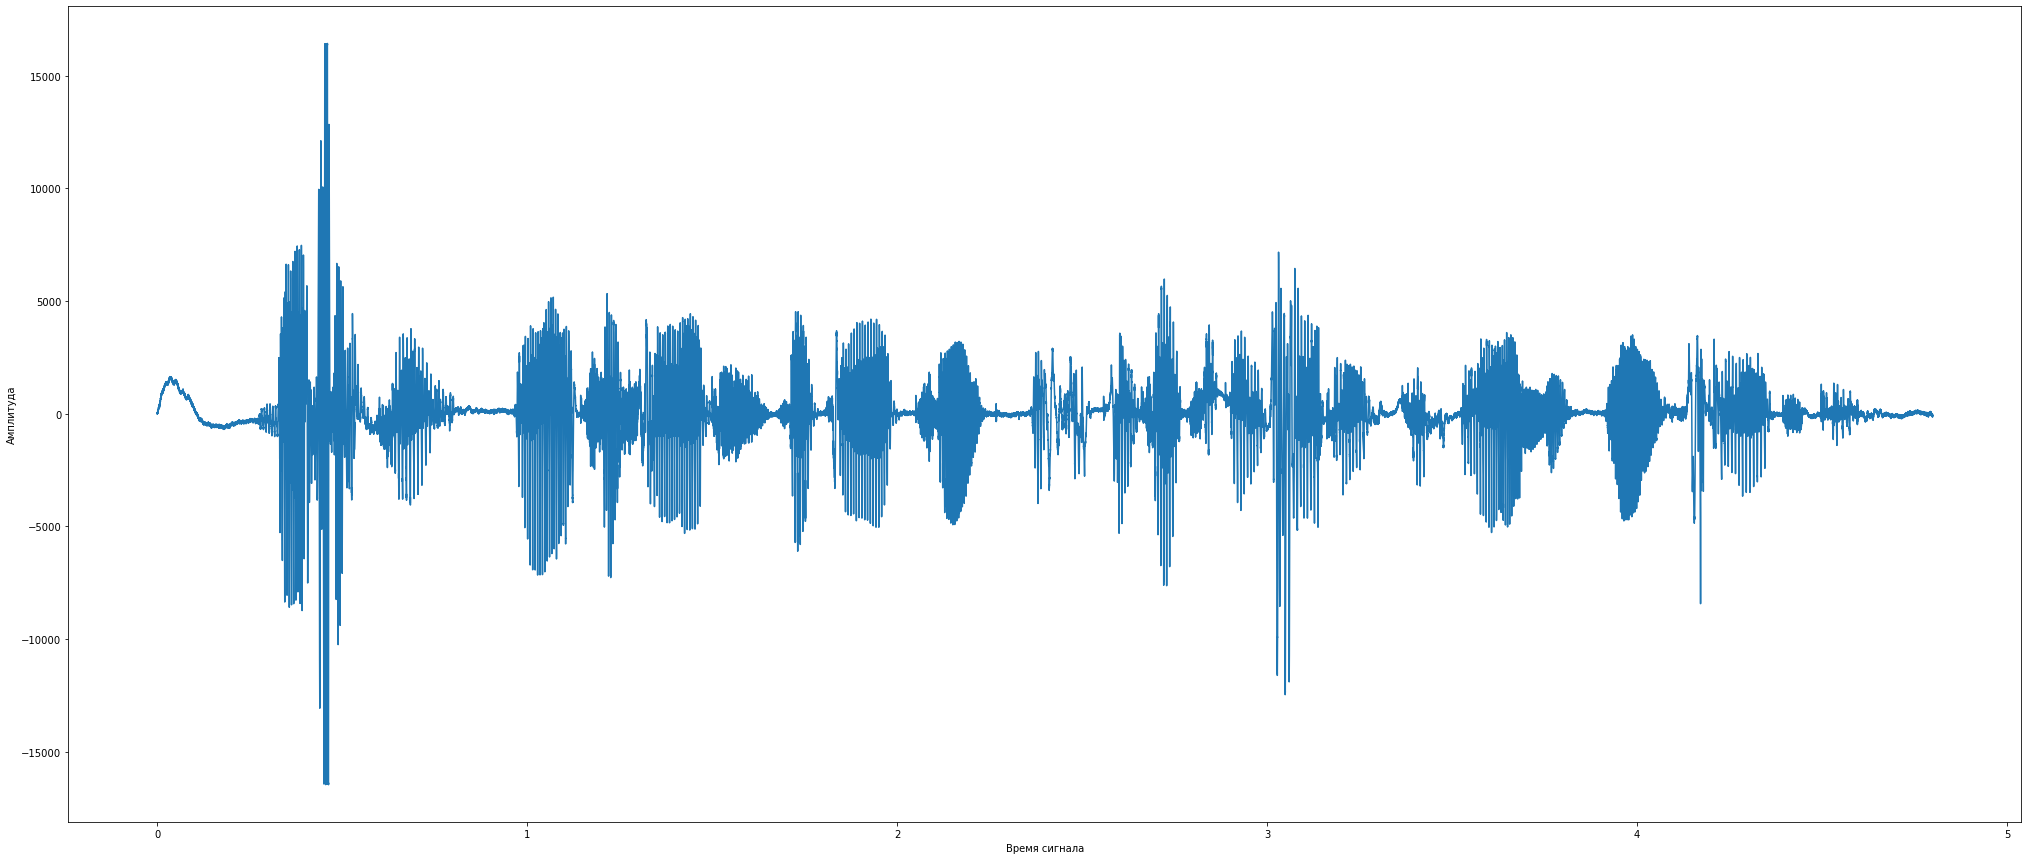

In [8]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import more_itertools as wind
import wavio 

wav = wavio.read("/home/indiora/MathPack/voice3.wav")

graph = plt.figure()
graph.set_figwidth(35)
graph.set_figheight(15)
plt.plot(np.linspace(0, wav.data.shape[0] / wav.rate, wav.data.shape[0]), wav.data)
plt.xlabel("Время сигнала")
plt.ylabel("Амплитуда")
plt.show()



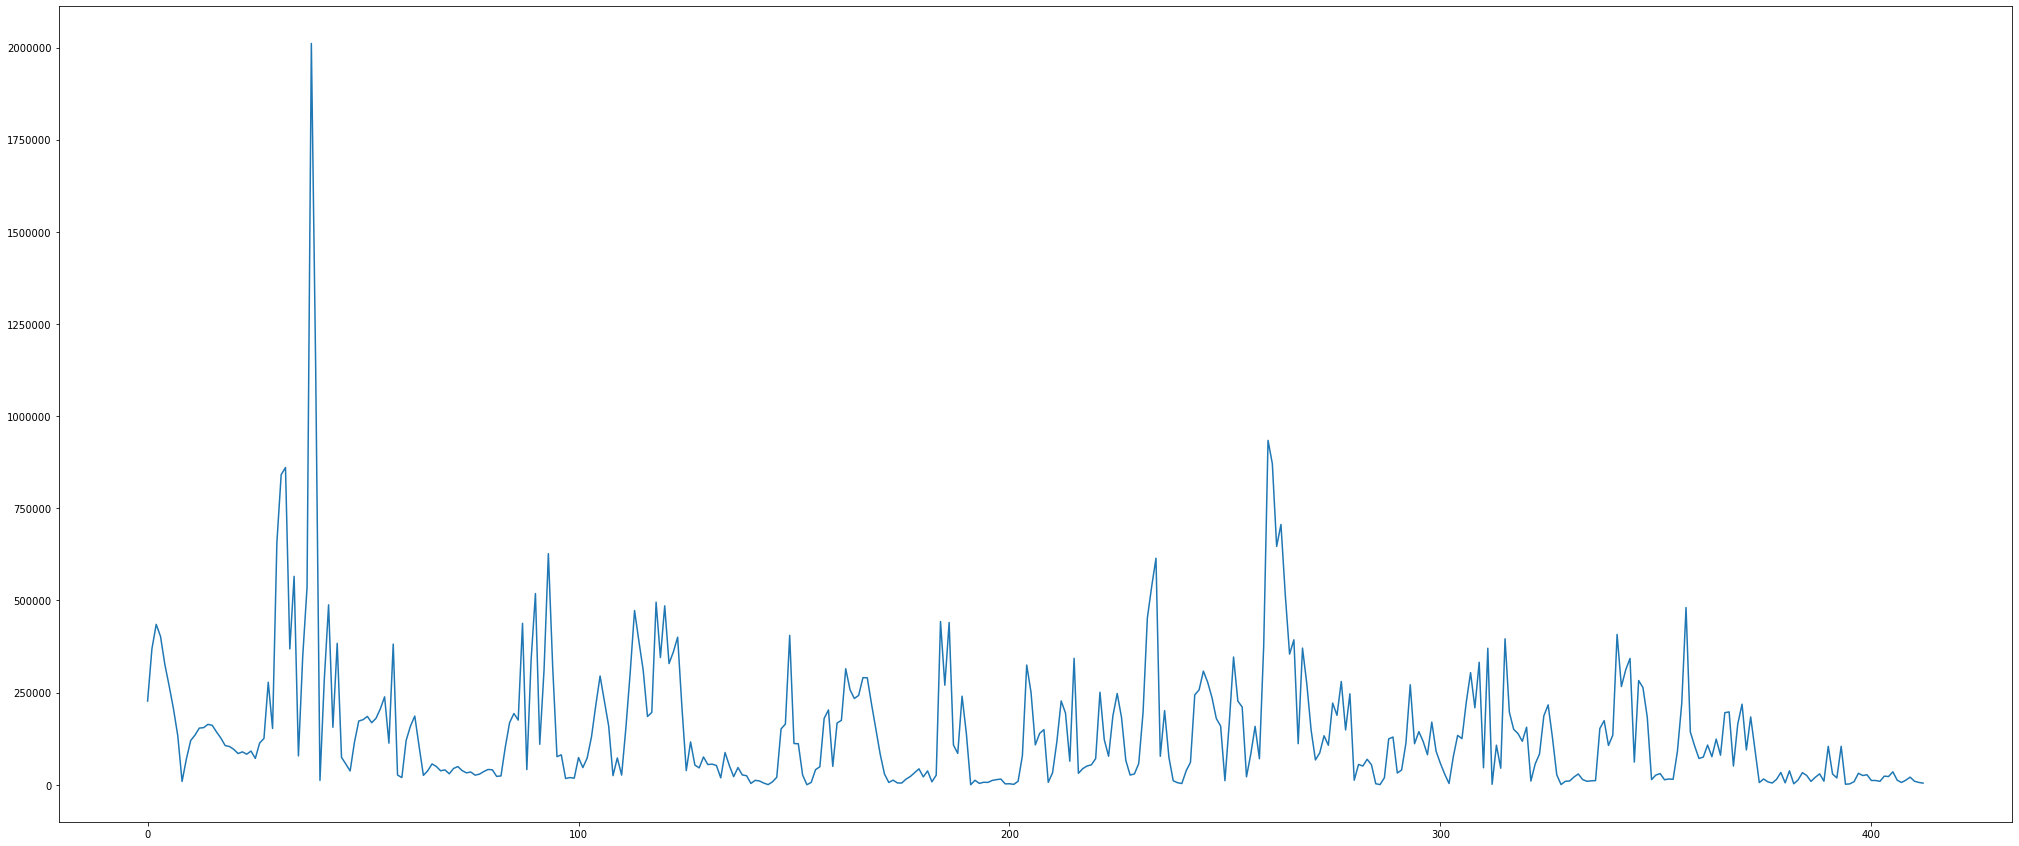

In [9]:
# Функция вычисляния ДПФ
def Calculate_DFT(value):
    a = len(value)
    b = np.arange(a)
    k = b.reshape((a, 1))
    e = np.exp(-2j * np.pi * k * b / a)
    return np.dot(e, value)

# размерность ДПФ
N = 512

# спектральное разрешение
S = int(wav.rate / N)

# сдвиг 0.5
shift  = int(0.5 * N)

# режем сигнал на отрезки
sliced = list(wind.windowed(wav.data[:,0], n = N, step = shift))
sliced[-1] = [i for i in sliced[-1] if i]

# домножаем на окно Хеннинга
sliced = [i*np.hanning(len(i)) for i in sliced]

# применяем функцию ДПФ
sliced = [Calculate_DFT(i) for i in sliced]

# вычисляем амплитудный спектр
ampl_spec = [sum([ j**2 for j in i[:int(len(i)/2)] ]) ** 0.5 for i in sliced]
ampl_spec = np.array([i.real for i in ampl_spec])

# отрисовываем график
graph = plt.figure()
graph.set_figwidth(35)
graph.set_figheight(15)
plt.plot(ampl_spec)
plt.show()

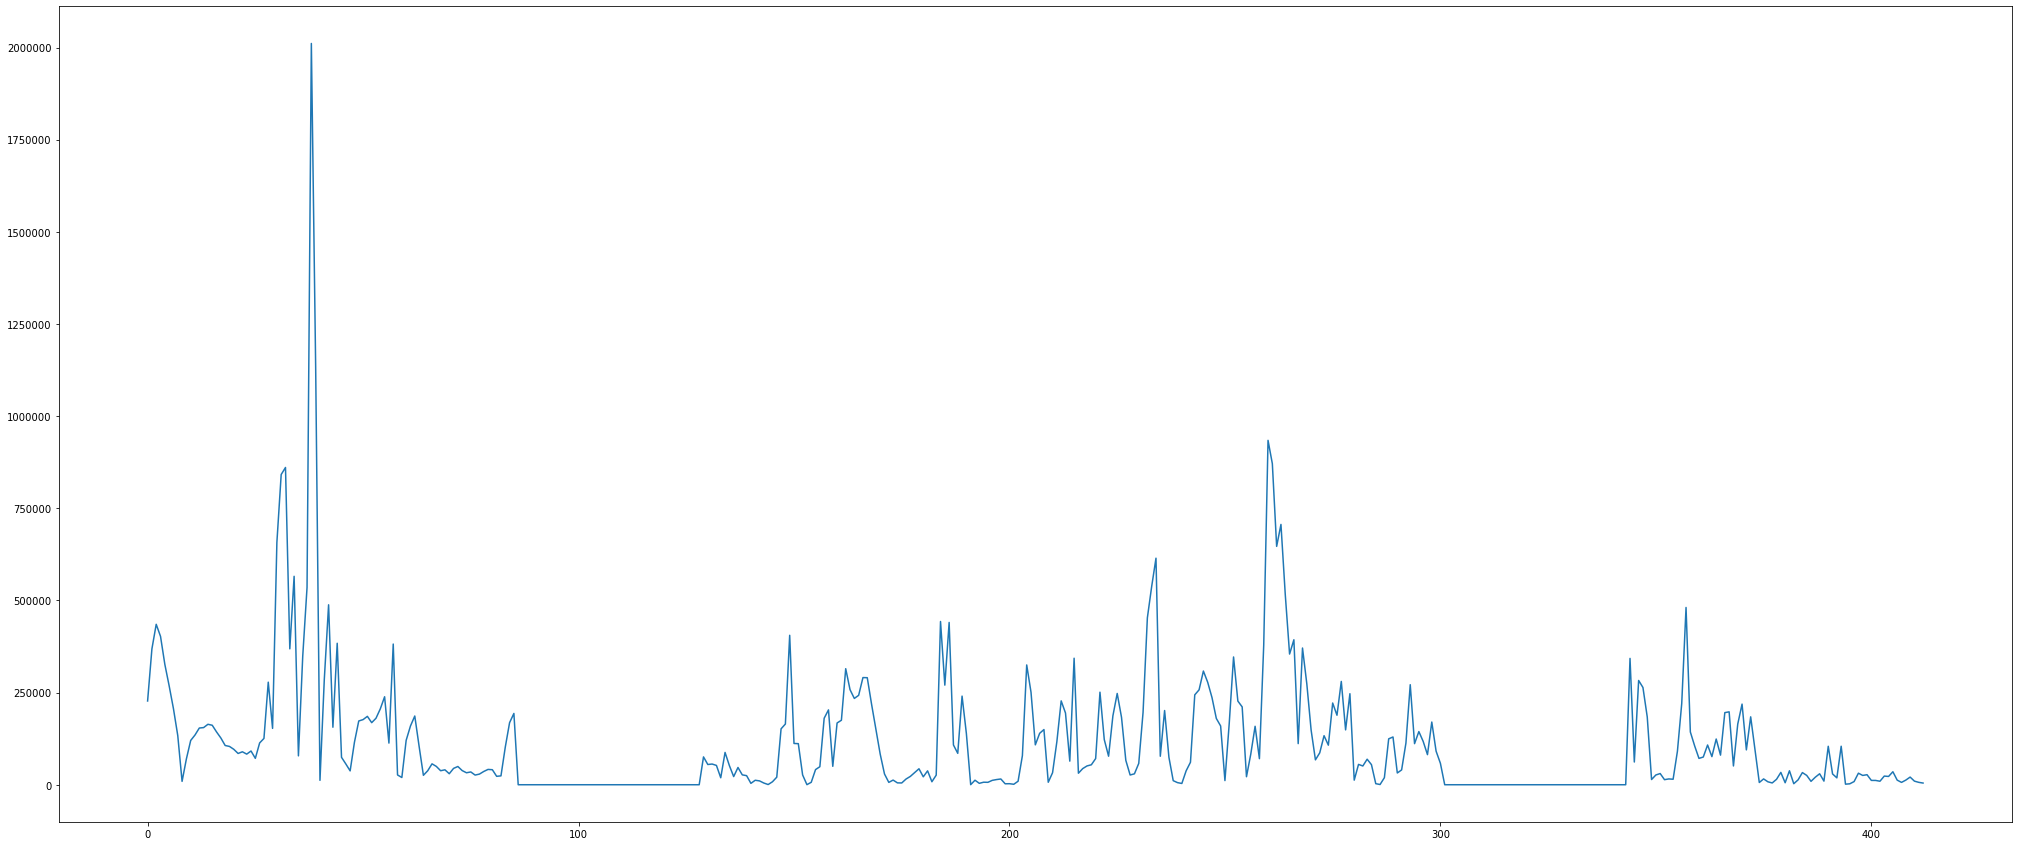

In [10]:
# форманта F0
F0 = []
l = 3.4
mass = list(wind.windowed(ampl_spec, n=S, step=S))
mass[-1] = [i for i in mass[-1] if i]

# перебираем интервалы
for i in mass:
    # преобразуем в массив NumPy
    mass_i = np.array(i)
    # если наибольшее значение больше среднего умноженого на l
    if mass_i.max() > l * mass_i.mean():   
        # перобразуем в массив Python и добавляем
        F0 += mass_i.tolist()
    else:
        # зануляем
        F0 += [0 for i in range(len(mass_i))]
        
# отрисовываем график F0
graph = plt.figure()
graph.set_figwidth(35)
graph.set_figheight(15)
plt.plot(F0)
plt.show()

2. Используя ДПФ построить траектории второй, третьей и четвертой формантных частот записи своего голоса

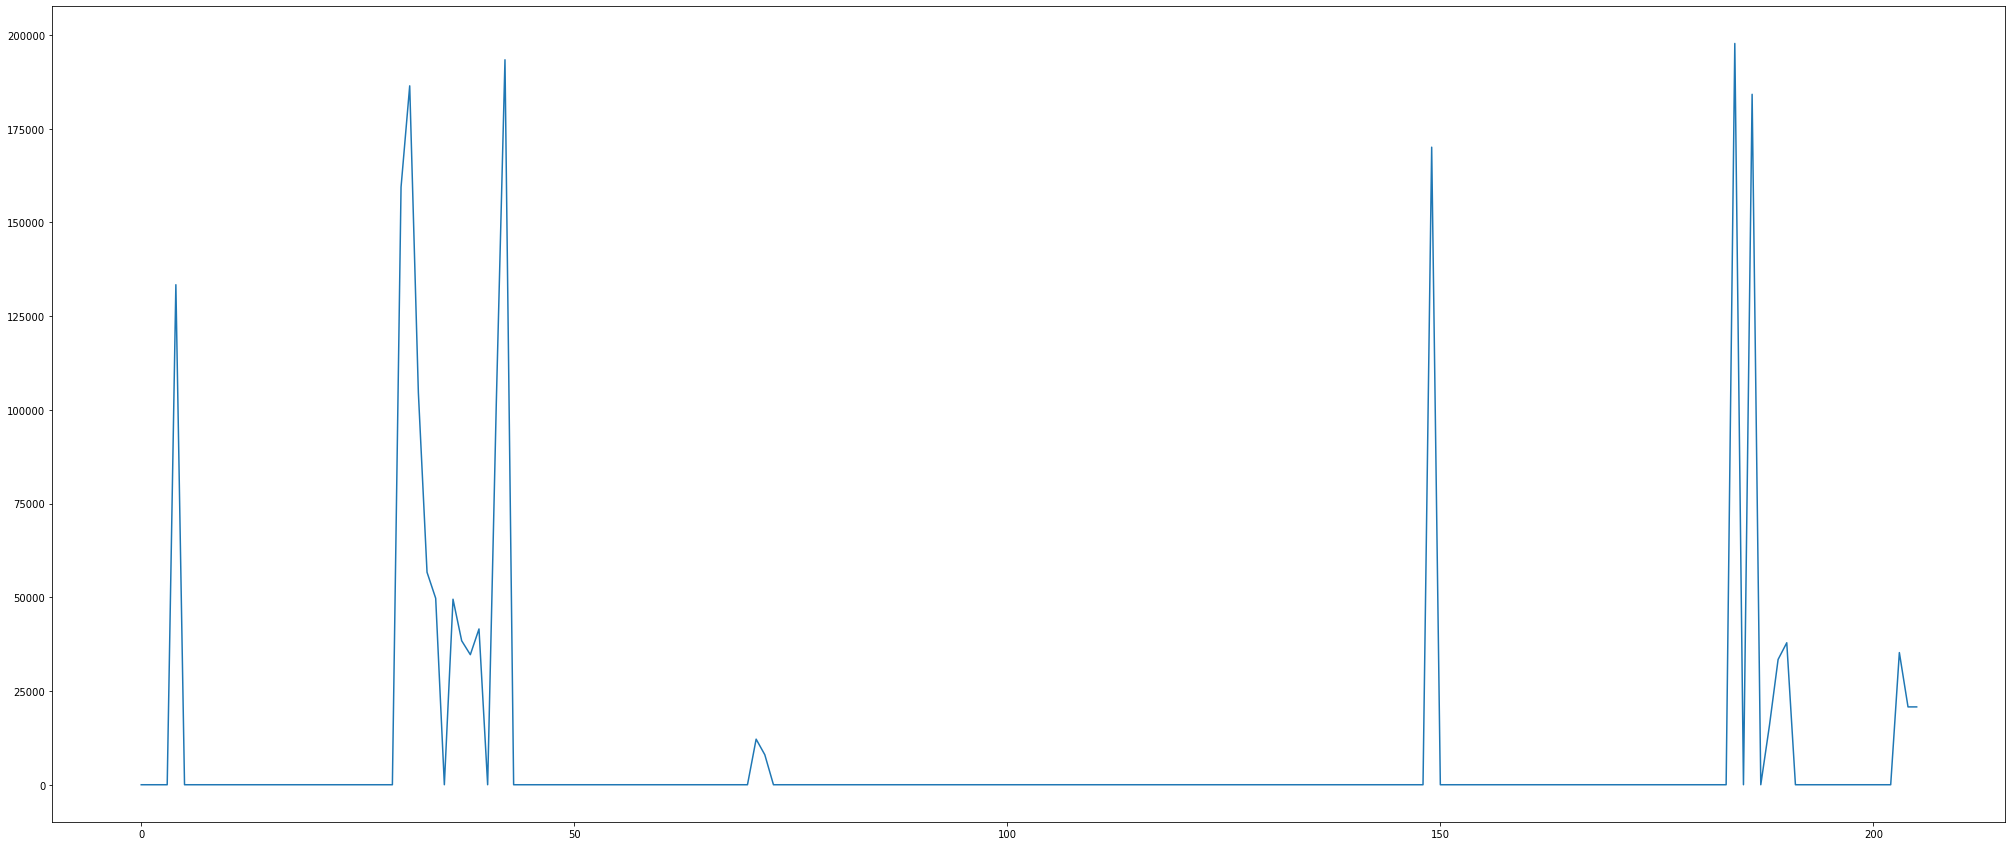

In [11]:
# форманта F1
F1 = []

for i in range(int(len(F0)/2)):
    max_spec = max([F0[2*i], F0[2*i-1], F0[2*i+1]])
    if F0[i] > 2*max_spec:           
        F1 += [max_spec]
    else:
        F1 += [0]
            
# отрисовываем график F1
graph = plt.figure()
graph.set_figwidth(35)
graph.set_figheight(15)
plt.plot(F1)
plt.show()



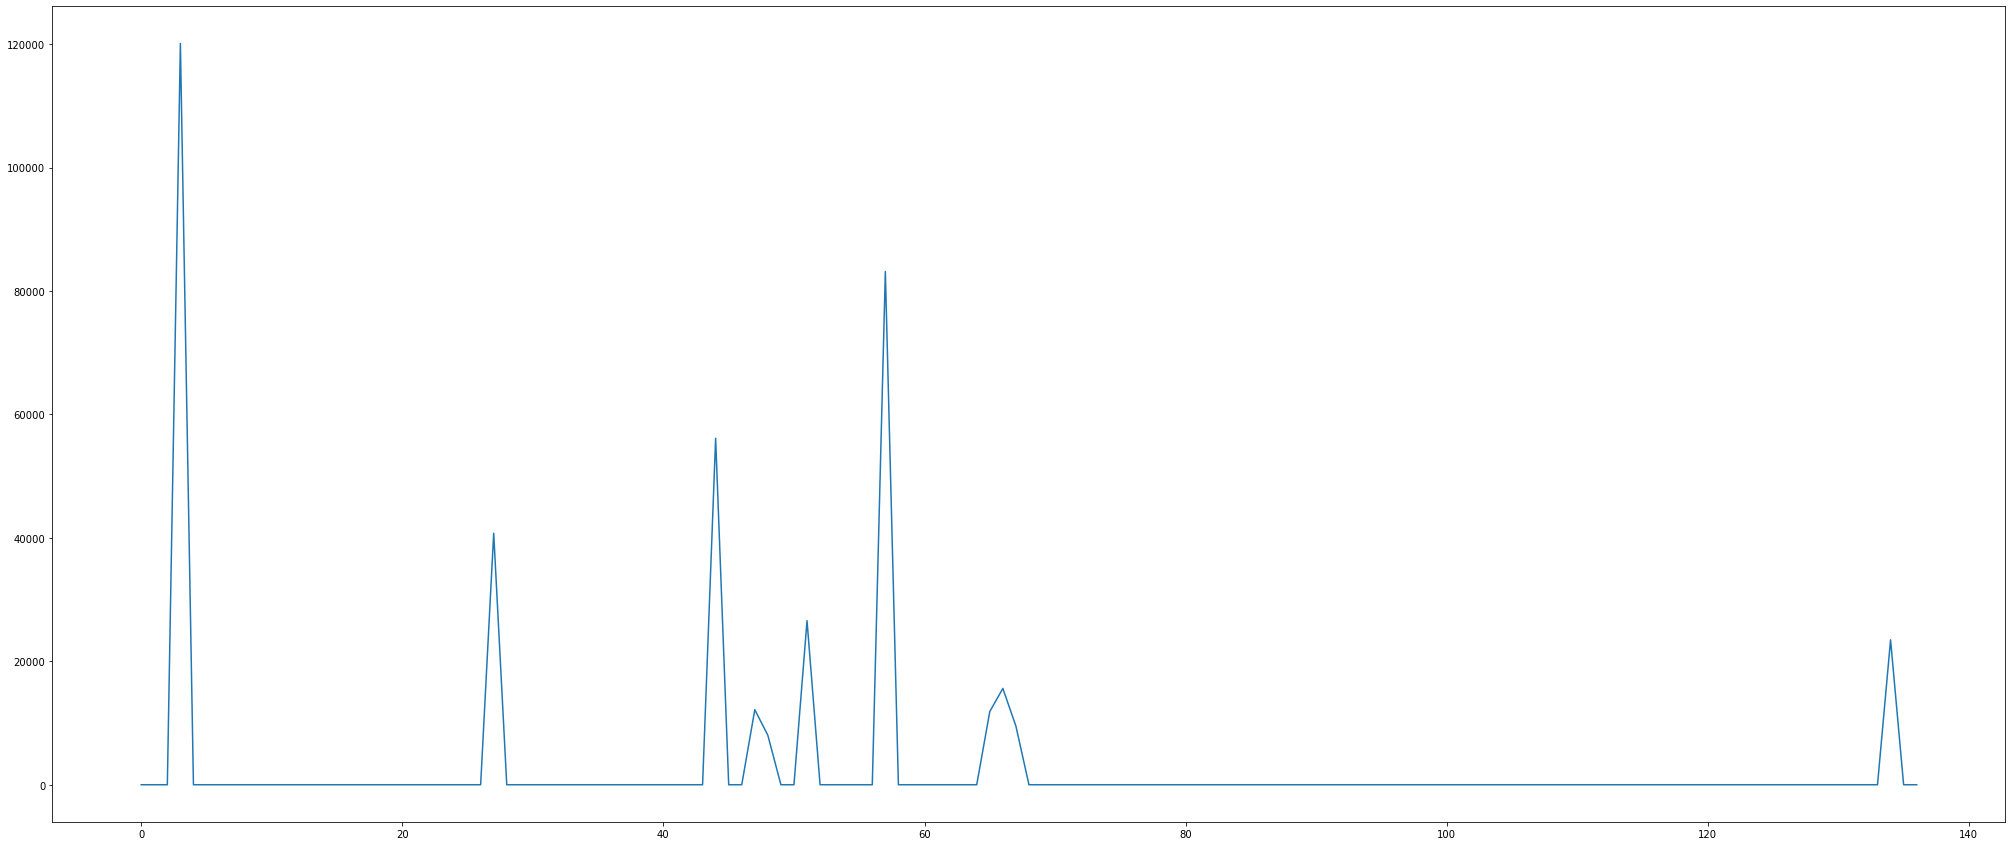

In [12]:
# форманта F2
F2 = []

for i in range(int(len(F0)/3)):
    max_spec = max([F0[3*i], F0[3*i-1], F0[3*i+1]])
    if F0[i] > 3*max_spec:           
        F2 += [max_spec]
    else:
        F2 += [0]
            
# отрисовываем график F2
graph = plt.figure()
graph.set_figwidth(35)
graph.set_figheight(15)
plt.plot(F2)
plt.show()

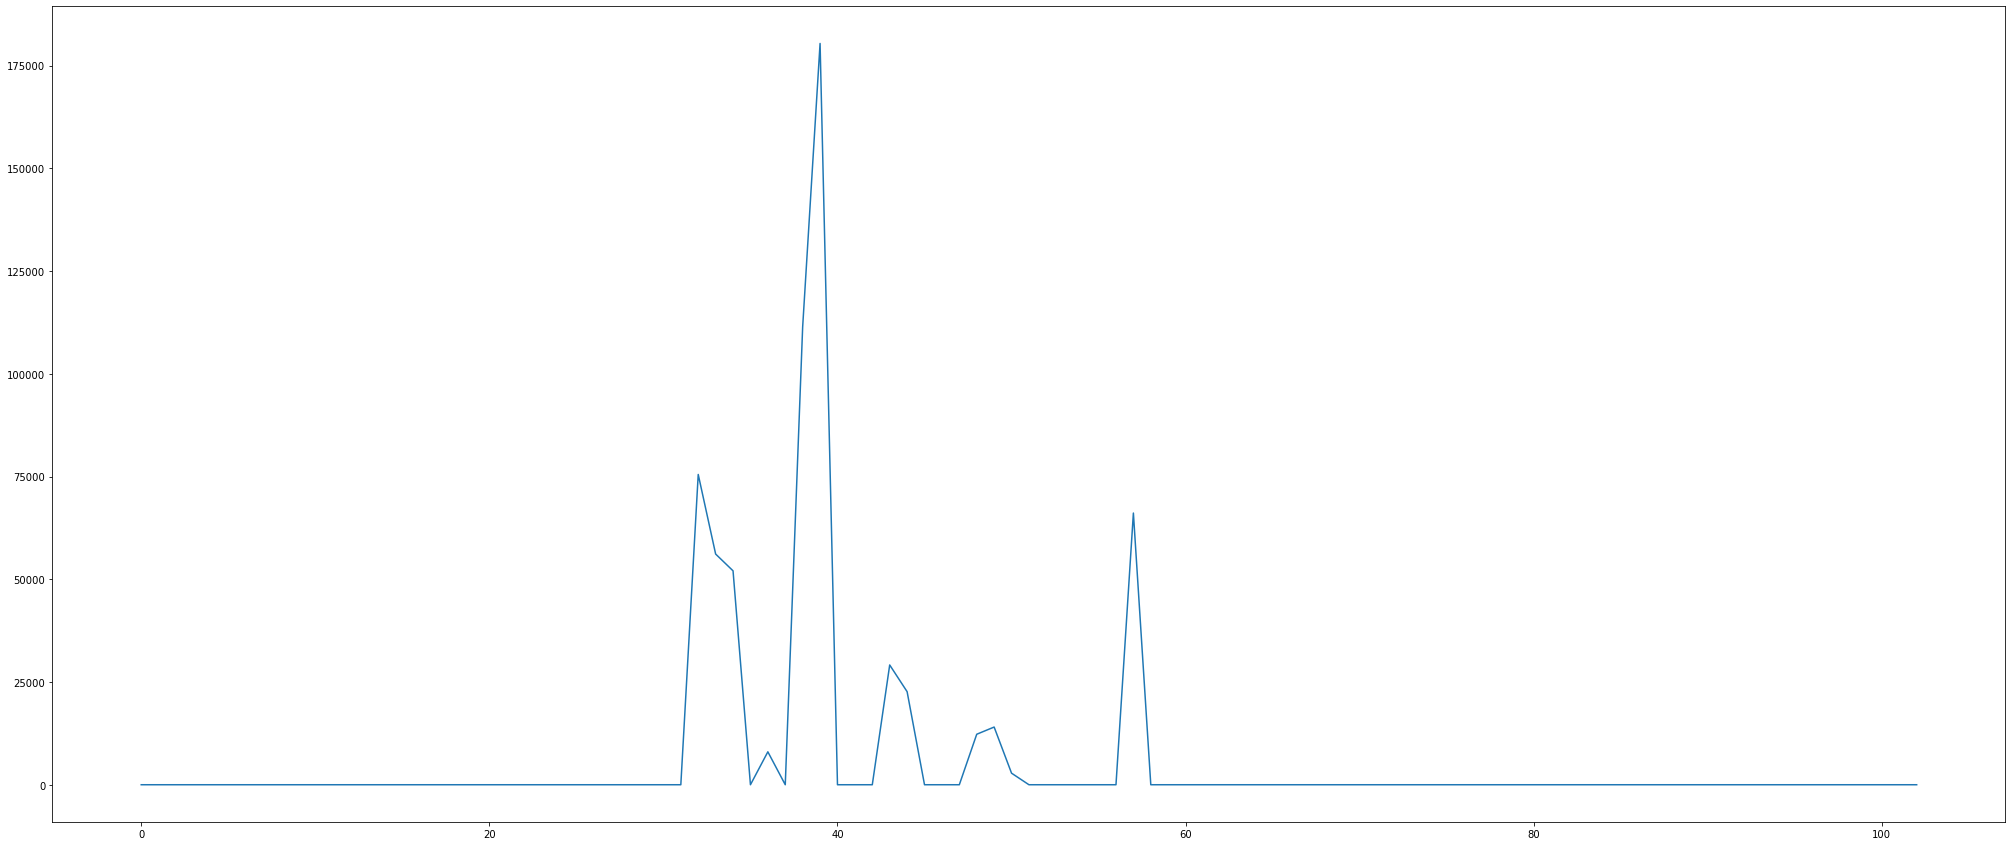

In [6]:
# форманта F3
F3 = []

for i in range(int(len(F0)/4)):
    max_spec = max([F0[4*i], F0[4*i-1], F0[4*i+1]])
    if F0[i] > 4*max_spec:           
        F3 += [max_spec]
    else:
        F3 += [0]
            
# отрисовываем график F3
graph = plt.figure()
graph.set_figwidth(35)
graph.set_figheight(15)
plt.plot(F3)
plt.show()

3. Построить сонограмму по записи своего голоса.

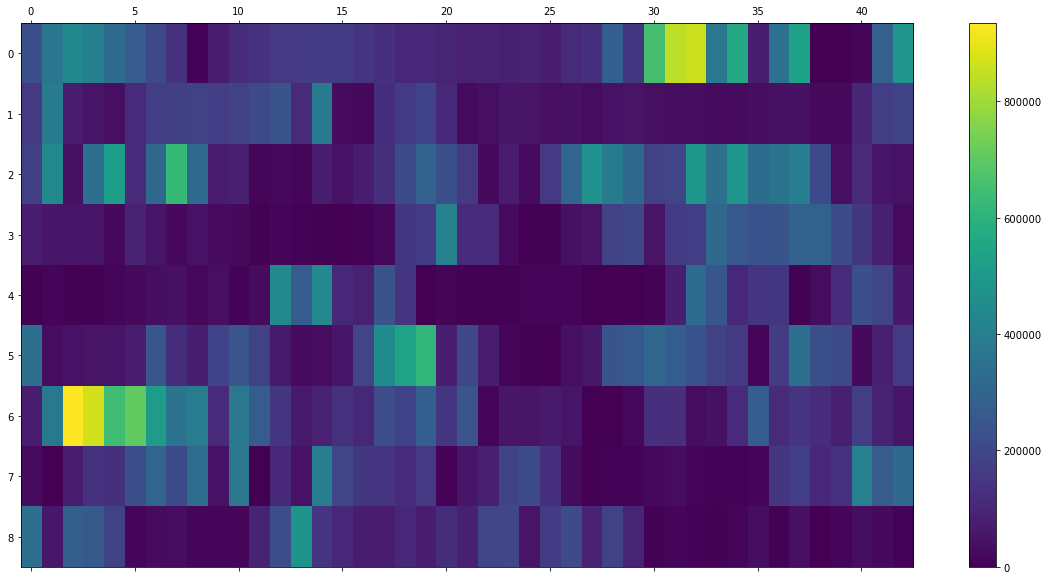

In [15]:
# заменяем кортежи на списки
for i in range(len(mass)):
    mass[i] = list(mass[i])

# зануляем максимум в начале
for i in mass:
    for j in range(len(i)):
        if i[j] > 1000000:
            i[j] = 0
    
draw = np.array(mass[:-1], dtype=float)

# строим сонограмму
fig, ax = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(10)
cax = ax.matshow(draw, interpolation="nearest", aspect="auto")
fig.colorbar(cax)
plt.show()

Вывод: в результате выполнения лабораторной работы на практике было применено дискретное приобразование Фурье, построенны траектории основного тона, второй, третей и четвертой форматы.